In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: /Users/melodi/sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
model_path = os.path.join(root_path, 'src/data/input')

In [5]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [6]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [7]:
for key, value in categories.items():
    #print(key)
    pass

In [6]:
print("Selected category from the list above:")
#category=input()
category='cat'
print(category)

Selected category from the list above:
cat


In [9]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, categories, category)

for (src_file, dst_file) in zip(src_list, dst_list): 
    print('src_file: {}, dst_file: {}'.format(src_file, dst_file))

Creating directories to save images, weights and the model ...
/Users/melodi/sliver-maestro/src/data folder exists...
/Users/melodi/sliver-maestro/src/save folder exists...
/Users/melodi/sliver-maestro/src/data/input folder exists...
/Users/melodi/sliver-maestro/src/data/output folder exists...
/Users/melodi/sliver-maestro/src/data/output/images folder exists...
/Users/melodi/sliver-maestro/src/data/output/positions folder exists...
/Users/melodi/sliver-maestro/src/data/raw folder is created...
/Users/melodi/sliver-maestro/src/save/cat folder exists...
/Users/melodi/sliver-maestro/src/data/input/cat folder exists...
/Users/melodi/sliver-maestro/src/data/raw/cat folder is created...
/Users/melodi/sliver-maestro/src/data/output/images/cat folder exists...
src_file: gs://quickdraw_dataset/full/numpy_bitmap/cat.npy, dst_file: /Users/melodi/sliver-maestro/src/data/input/cat/cat.npy
src_file: gs://quickdraw_dataset/full/raw/cat.ndjson, dst_file: /Users/melodi/sliver-maestro/src/data/raw/cat/

In [11]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
- [1/1 files][ 92.1 MiB/ 92.1 MiB] 100% Done   3.7 MiB/s ETA 00:00:00           
Operation completed over 1 objects/92.1 MiB.                                     
Copying gs://quickdraw_dataset/full/raw/cat.ndjson...
/ [1/1 files][496.9 MiB/496.9 MiB] 100% Done   3.8 MiB/s ETA 00:00:00           
Operation completed over 1 objects/496.9 MiB.                                    


In [12]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [13]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [13]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [14]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 123202 to display and compare bitmap and raw images:
Bitmap image:


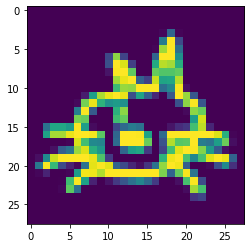

Raw image:
There are 9 number of strokes in this raw image file!


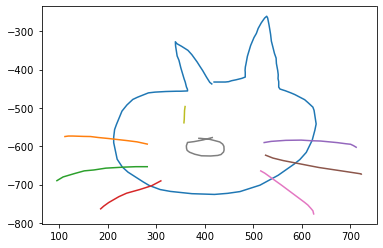

In [15]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [14]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [7]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [9]:
# TRAINING AND TESTING

#train_data = Dataset(x_train)
#test_data = Dataset(x_test)



model = DRAW(category)
print("training...")
model.start(phase='train') 



training...


/Users/melodi/sliver-maestro/src/draw_model.py:210: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), self.clip)


KeyboardInterrupt: 

## Generating Images

In [10]:
test_model = Test(category)

reconstructing images...
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_0.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_1.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_2.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_3.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_4.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_5.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_6.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_7.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_8.png
/Users/melodi/sliver-maestro/src/data/output/images/cat/cat_test_9.png


array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 7.56414222e-29, 2.74208864e-16,
        6.73699763e-10, 1.47392541e-06, 9.90025146e-05, 9.45399283e-04,
        2.52119638e-03, 2.99023185e-03, 2.34671426e-03, 1.54615461e-03,
        9.46159766e-04, 6.30821567e-04, 6.10506802e-04, 9.83907608e-04,
        2.00363365e-03, 3.16884252e-03, 2.82050110e-03, 1.28043629e-03,
        2.83168367e-04, 2.69919419e-05, 8.81993685e-07, 6.32207042e-09,
        2.85459698e-12,

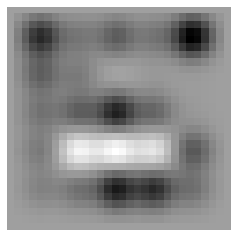

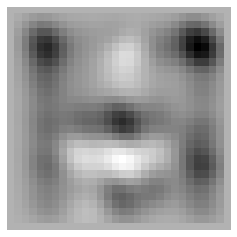

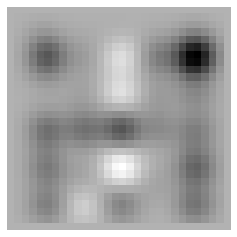

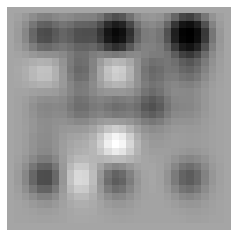

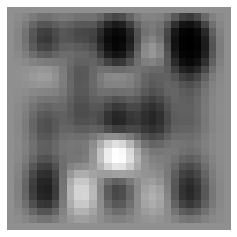

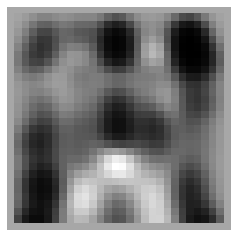

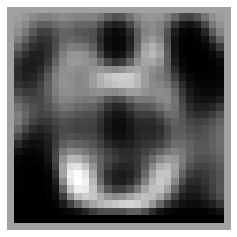

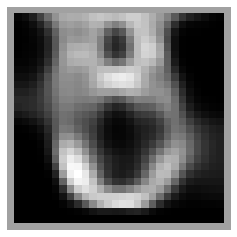

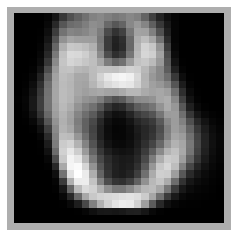

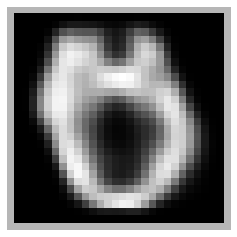

In [11]:
img_loc = {'startr': 0, 'endr': 30, 'startc': 0, 'endc': 30}
## MC: Check the remaining shuffling operations
print("reconstructing images...")
test_model.xrecons_grid(img_loc)